## 1. 导入数据并查看数据空值情况

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline

train_df = pd.read_csv("data/raw_data/train.csv", index_col=0)
test_df = pd.read_csv("data/raw_data/testA.csv", index_col=0)

In [2]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800000 entries, 0 to 799999
Data columns (total 46 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            800000 non-null  float64
 1   term                800000 non-null  int64  
 2   interestRate        800000 non-null  float64
 3   installment         800000 non-null  float64
 4   grade               800000 non-null  object 
 5   subGrade            800000 non-null  object 
 6   employmentTitle     799999 non-null  float64
 7   employmentLength    753201 non-null  object 
 8   homeOwnership       800000 non-null  int64  
 9   annualIncome        800000 non-null  float64
 10  verificationStatus  800000 non-null  int64  
 11  issueDate           800000 non-null  object 
 12  isDefault           800000 non-null  int64  
 13  purpose             800000 non-null  int64  
 14  postCode            799999 non-null  float64
 15  regionCode          800000 non-nul

In [4]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 800000 to 999999
Data columns (total 45 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   loanAmnt            200000 non-null  float64
 1   term                200000 non-null  int64  
 2   interestRate        200000 non-null  float64
 3   installment         200000 non-null  float64
 4   grade               200000 non-null  object 
 5   subGrade            200000 non-null  object 
 6   employmentTitle     200000 non-null  float64
 7   employmentLength    188258 non-null  object 
 8   homeOwnership       200000 non-null  int64  
 9   annualIncome        200000 non-null  float64
 10  verificationStatus  200000 non-null  int64  
 11  issueDate           200000 non-null  object 
 12  purpose             200000 non-null  int64  
 13  postCode            200000 non-null  float64
 14  regionCode          200000 non-null  int64  
 15  dti                 199939 no

## 数据清洗

In [5]:
train_df.describe().T

,count,mean,std,min,25%,50%,75%,max
loanAmnt,800000.0,14416.818875,8716.086178,500.00,8000.00,12000.000,20000.00,40000.00
term,800000.0,3.482745,0.855832,3.00,3.00,3.000,3.00,5.00
interestRate,800000.0,13.238391,4.765757,5.31,9.75,12.740,15.99,30.99
installment,800000.0,437.947723,261.460393,15.69,248.45,375.135,580.71,1715.42
employmentTitle,799999.0,72005.351714,106585.640204,0.00,427.00,7755.000,117663.50,378351.00
homeOwnership,800000.0,0.614213,0.675749,0.00,0.00,1.000,1.00,5.00
annualIncome,800000.0,76133.910493,68947.513672,0.00,45600.00,65000.000,90000.00,10999200.00
verificationStatus,800000.0,1.009683,0.782716,0.00,0.00,1.000,2.00,2.00
isDefault,800000.0,0.199513,0.399634,0.00,0.00,0.000,0.00,1.00
purpose,800000.0,1.745982,2.367453,0.00,0.00,0.000,4.00,13.00


In [6]:
print(f'There are {train_df.isnull().any().sum()} columns in train dataset with missing values.')

There are 22 columns in train dataset with missing values.


In [7]:
# 查看空值缺失率
have_null_rate = (train_df.isnull().sum() / len(train_df)).to_dict()
for col, rate in have_null_rate.items():
    if rate >= 0.5:
        print(col, rate)

<AxesSubplot:>

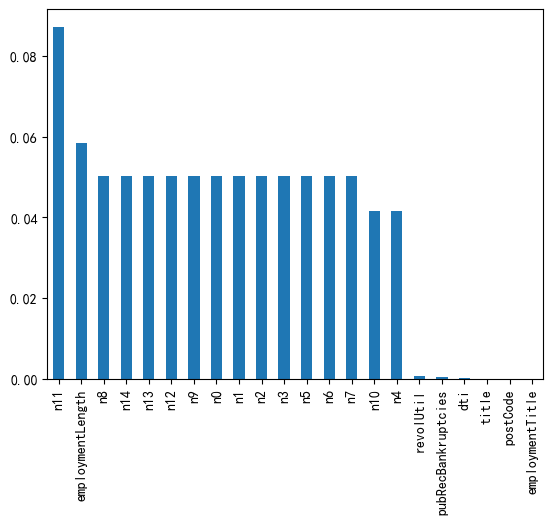

In [6]:
missing = train_df.isnull().sum()/len(train_df)
missing = missing[missing > 0]
missing.sort_values(ascending=False, inplace=True)
missing.plot.bar()

In [4]:
one_value_fea = [col for col in train_df.columns if train_df[col].nunique() <= 1]
one_value_fea

['policyCode']

因为 policyCode 列只有一个值，所以考虑删除

In [5]:
numerical_fea = list(train_df.select_dtypes(exclude=['object']).columns)
category_fea = list(filter(lambda x : x not in numerical_fea, list(train_df.columns)))
numerical_fea

['loanAmnt',
 'term',
 'interestRate',
 'installment',
 'employmentTitle',
 'homeOwnership',
 'annualIncome',
 'verificationStatus',
 'isDefault',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'initialListStatus',
 'applicationType',
 'title',
 'policyCode',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n11',
 'n12',
 'n13',
 'n14']

In [11]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [12]:
# 查看 grade 的数值构成
train_df['grade'].value_counts()

B    233690
C    227118
A    139661
D    119453
E     55661
F     19053
G      5364
Name: grade, dtype: int64

[('policyCode', 1), ('term', 2), ('isDefault', 2), ('initialListStatus', 2), ('applicationType', 2), ('verificationStatus', 3), ('n11', 5), ('n12', 5), ('homeOwnership', 6), ('grade', 7), ('employmentLength', 11), ('pubRecBankruptcies', 11), ('purpose', 14), ('n13', 28), ('delinquency_2years', 30), ('n14', 31), ('pubRec', 32), ('n1', 33), ('subGrade', 35), ('ficoRangeLow', 39), ('ficoRangeHigh', 39), ('n0', 39), ('n9', 44), ('n4', 46), ('n2', 50), ('n3', 50), ('regionCode', 51), ('n5', 65), ('n7', 70), ('openAcc', 75), ('n10', 76), ('n8', 102), ('n6', 107), ('totalAcc', 134), ('issueDate', 139), ('interestRate', 641), ('earliesCreditLine', 720), ('postCode', 932), ('revolUtil', 1286), ('loanAmnt', 1540), ('dti', 6321), ('title', 39644), ('annualIncome', 44926), ('revolBal', 71116), ('installment', 72360), ('employmentTitle', 248683)]


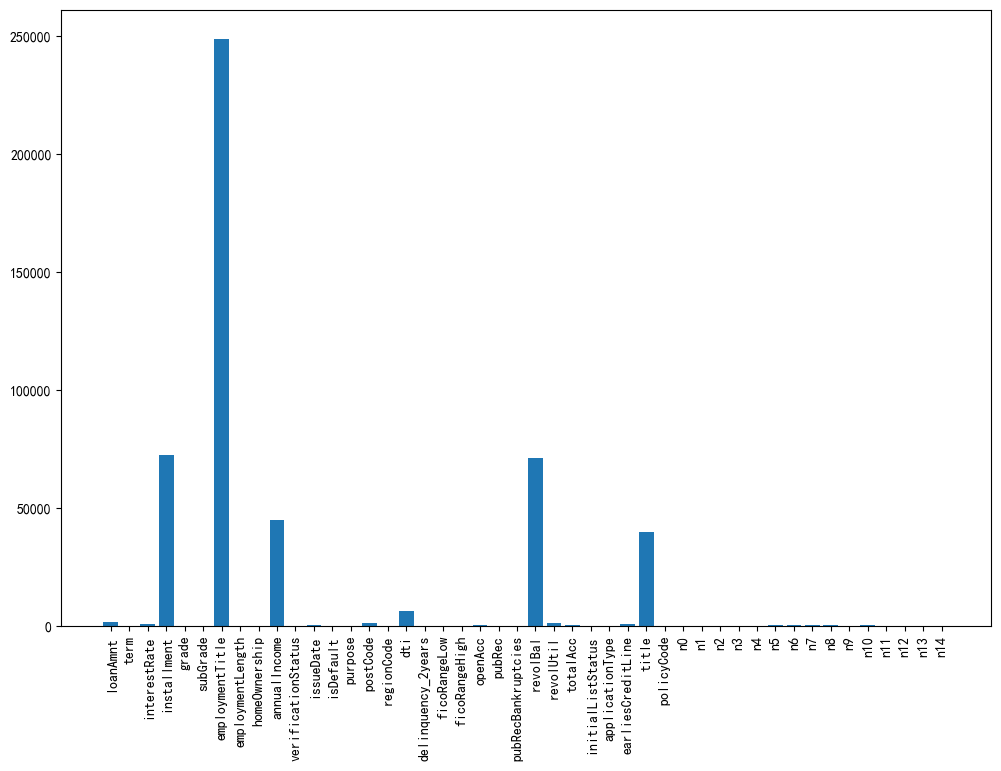

In [13]:
# 查看各个维度的值数量
x, y = [], []
for column in train_df.columns:
    vc = train_df[column].value_counts()
    x.append(column)
    y.append(len(vc))

print(list(sorted(zip(x, y), key=lambda x: x[1])))
%matplotlib inline
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
ax.bar(x, y)
_ = plt.xticks(rotation=90) # 设置横轴旋转

In [7]:
# 过滤数值型类别特征
def get_numerical_serial_fea(data, feas):
    numerical_serial_fea = []
    numerical_noserial_fea = []
    for fea in feas:
        temp = data[fea].nunique()
        if temp <= 10:
            numerical_noserial_fea.append(fea)
            continue
        numerical_serial_fea.append(fea)
    return numerical_serial_fea, numerical_noserial_fea


numerical_serial_fea, numerical_noserial_fea = get_numerical_serial_fea(train_df, numerical_fea)

In [8]:
numerical_serial_fea

['loanAmnt',
 'interestRate',
 'installment',
 'employmentTitle',
 'annualIncome',
 'purpose',
 'postCode',
 'regionCode',
 'dti',
 'delinquency_2years',
 'ficoRangeLow',
 'ficoRangeHigh',
 'openAcc',
 'pubRec',
 'pubRecBankruptcies',
 'revolBal',
 'revolUtil',
 'totalAcc',
 'title',
 'n0',
 'n1',
 'n2',
 'n3',
 'n4',
 'n5',
 'n6',
 'n7',
 'n8',
 'n9',
 'n10',
 'n13',
 'n14']

In [16]:
numerical_noserial_fea

['term',
 'homeOwnership',
 'verificationStatus',
 'isDefault',
 'initialListStatus',
 'applicationType',
 'policyCode',
 'n11',
 'n12']

In [17]:
for fea in numerical_noserial_fea:
    print(fea)
    print(train_df[fea].value_counts())
    print("")

term
3    606902
5    193098
Name: term, dtype: int64

homeOwnership
0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64

verificationStatus
1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64

isDefault
0    640390
1    159610
Name: isDefault, dtype: int64

initialListStatus
0    466438
1    333562
Name: initialListStatus, dtype: int64

applicationType
0    784586
1     15414
Name: applicationType, dtype: int64

policyCode
1.0    800000
Name: policyCode, dtype: int64

n11
0.0    729682
1.0       540
2.0        24
4.0         1
3.0         1
Name: n11, dtype: int64

n12
0.0    757315
1.0      2281
2.0       115
3.0        16
4.0         3
Name: n12, dtype: int64



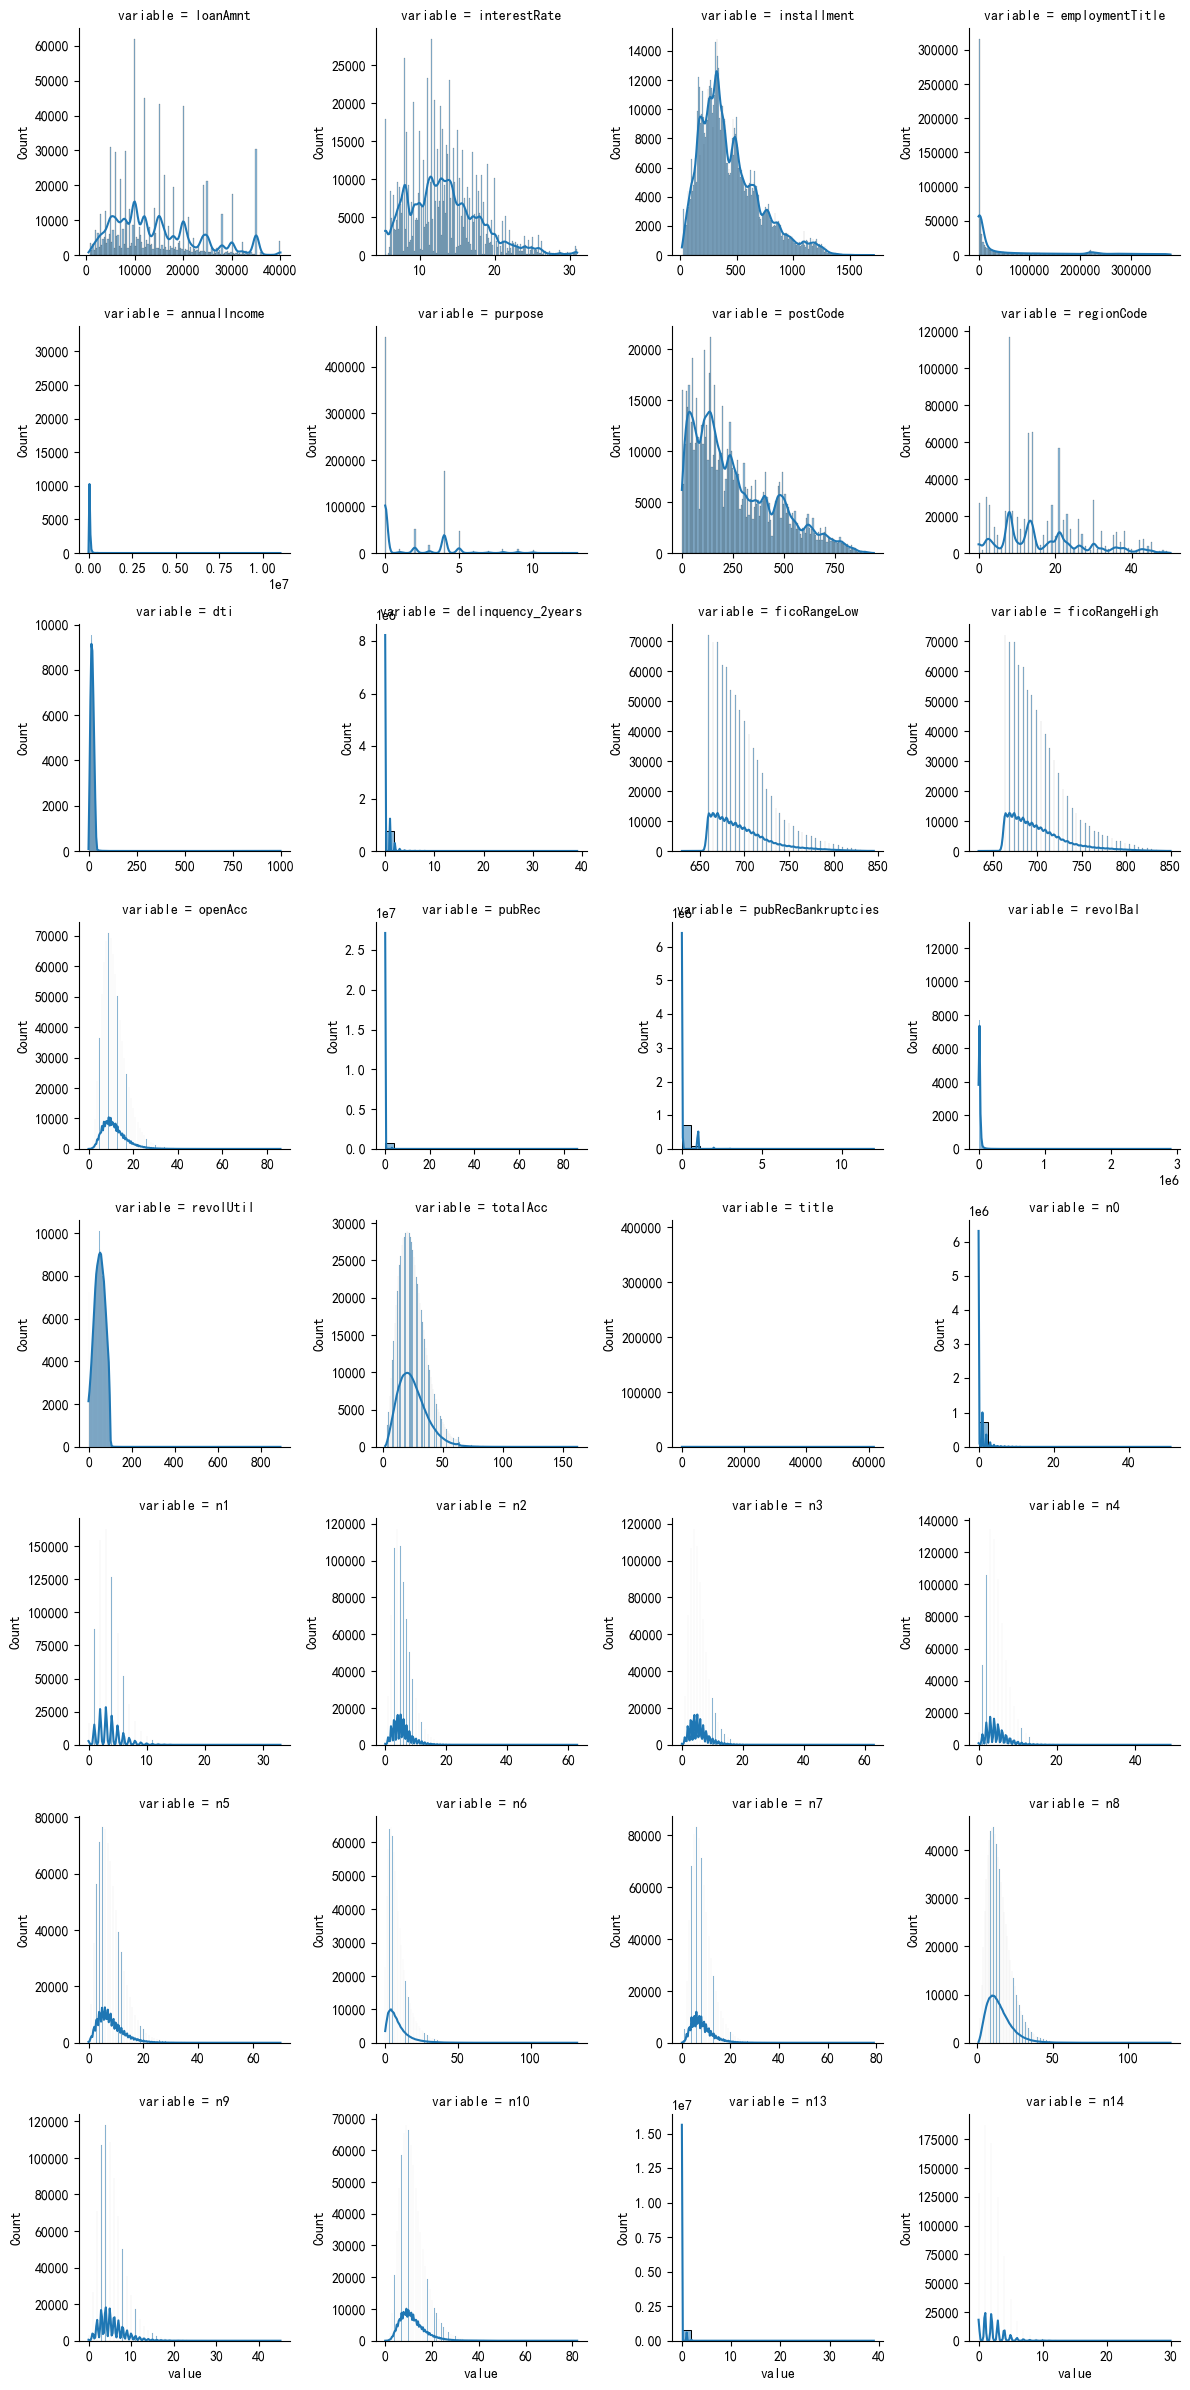

In [18]:
# 每个数字特征的分布可视化
f = pd.melt(train_df, value_vars=numerical_serial_fea)
g = sns.FacetGrid(f, col="variable", col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.histplot, "value", kde=True)

/home/chase/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/chase/miniconda3/envs/dev/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, '概率')

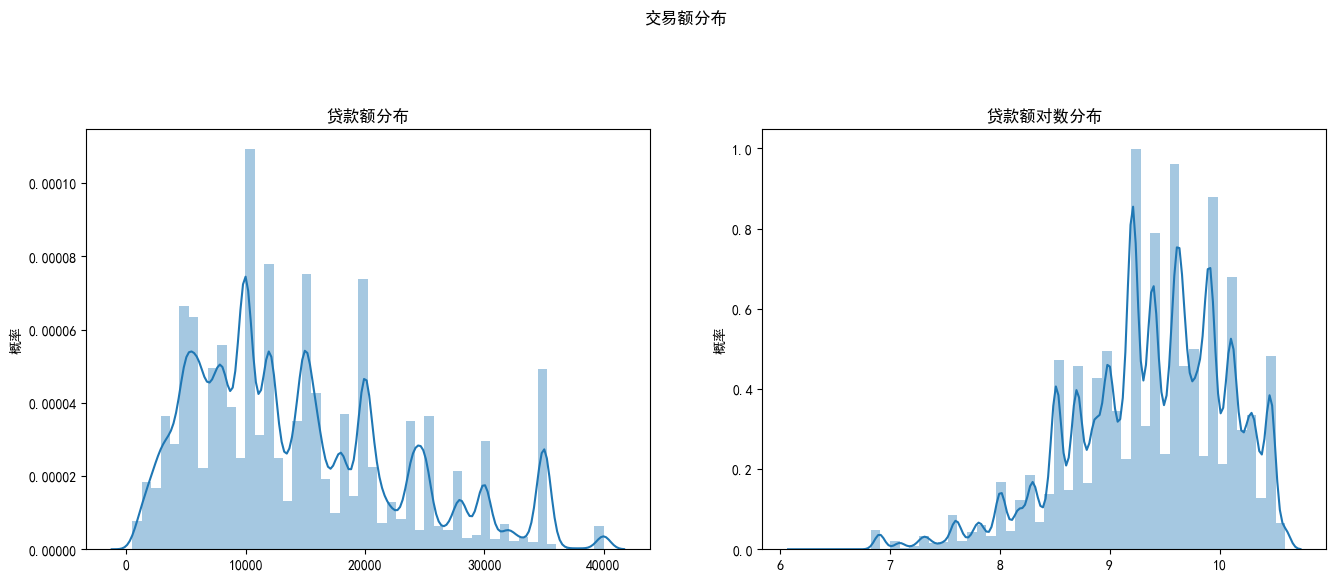

In [9]:
plt.figure(figsize=(16, 12))
plt.suptitle("交易额分布") 
plt.subplot(221)

sub_plot_1 = sns.distplot(train_df['loanAmnt'])
sub_plot_1.set_title("贷款额分布")
sub_plot_1.set_xlabel("")
sub_plot_1.set_ylabel("概率")

plt.subplot(222)
sub_plot_2 = sns.distplot(np.log(train_df['loanAmnt']))
sub_plot_2.set_title("贷款额对数分布")
sub_plot_2.set_xlabel("")
sub_plot_2.set_ylabel("概率")

In [11]:
category_fea

['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']

In [14]:
for val in category_fea: 
    print(val, len(train_df[val].value_counts()))

grade 7
subGrade 35
employmentLength 11
issueDate 139
earliesCreditLine 720


In [17]:
train_df['subGrade'].value_counts()

C1    50763
B4    49516
B5    48965
B3    48600
C2    47068
C3    44751
C4    44272
B2    44227
B1    42382
C5    40264
A5    38045
A4    30928
D1    30538
D2    26528
A1    25909
D3    23410
A3    22655
A2    22124
D4    21139
D5    17838
E1    14064
E2    12746
E3    10925
E4     9273
E5     8653
F1     5925
F2     4340
F3     3577
F4     2859
F5     2352
G1     1759
G2     1231
G3      978
G4      751
G5      645
Name: subGrade, dtype: int64

In [19]:
import pandas_profiling
pfr = pandas_profiling.ProfileReport(train_df)
pfr.to_file("./example.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

/home/chase/miniconda3/envs/dev/lib/python3.10/site-packages/scipy/stats/_stats_py.py:5215: RuntimeWarning: overflow encountered in long_scalars
  (2 * xtie * ytie) / m + x0 * y0 / (9 * m * (size - 2)))


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]